# My Matched SFR
My catalogue matched with COSMOS but done by myself. primary is matched on position, and secondary is matched by redshift from within a ten arcsecond radius.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
tqdm.pandas()

In [2]:
data_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/data'

In [3]:
my_cosmo_cat = pd.read_csv(f'{data_folder}/cosmos-matched-df.csv', index_col = 0)

In [4]:
my_cosmo_cat.head()

,SourceID,id_1,ssfr_best_1,ssfr_med_max68_1,ssfr_med_min68_1,ssfr_med_1,sfr_best_1,sfr_med_max68_1,sfr_med_min68_1,sfr_med_1,...,flag_shallow_2,l_r_2,l_k_2,l_nu_2,dist_2,RA,Dec,int_prediction,references,status
0,4000705532455,590539.0,-8.847,-8.463,-8.865,-8.712,0.508,0.835,0.477,0.655,...,1.0,27.260,27.124,27.074,9.361438,150.679664,2.196615,0.970096,['2007ApJS..172...99C'],Referenced
1,4000705532984,610283.0,-10.040,-9.922,-10.065,-9.990,0.536,0.486,0.335,0.411,...,1.0,27.868,27.811,27.848,7.778731,150.673546,2.226438,0.961160,['2007ApJS..172...99C'],Referenced
2,4000705533312,621053.0,-10.258,-10.232,-10.368,-10.300,-0.058,-0.032,-0.168,-0.100,...,1.0,29.620,29.874,28.661,2.627196,150.667975,2.242945,0.995066,"['2007ApJS..172...99C', '2007ApJS..172...99C',...",Referenced
3,4000705533383,617834.0,-9.445,-9.322,-9.470,-9.398,0.132,0.179,0.034,0.107,...,1.0,29.232,29.068,29.135,2.241379,150.645125,2.237650,0.985773,"['2007ApJS..172...99C', '2007ApJS..172...99C',...",Referenced
4,4000705539529,882817.0,-8.783,-8.753,-9.122,-8.868,1.319,1.346,1.025,1.232,...,0.0,28.572,28.466,28.323,3.301196,149.686626,2.637161,0.992917,"['2009ApJS..184..218L', '2007ApJS..172...99C']",Referenced


In [5]:
stu_cosmo_cat = pd.read_csv(f'{data_folder}/cat-matched-to-cosmos.csv', index_col = 0)[['SourceID', 'category']]

In [6]:
df_merge = my_cosmo_cat.merge(stu_cosmo_cat, on = 'SourceID', how = 'left')

In [7]:
df_merge.columns

Index(['SourceID', 'id_1', 'ssfr_best_1', 'ssfr_med_max68_1',
       'ssfr_med_min68_1', 'ssfr_med_1', 'sfr_best_1', 'sfr_med_max68_1',
       'sfr_med_min68_1', 'sfr_med_1', 'mass_best_1', 'mass_med_max68_1',
       'mass_med_min68_1', 'mass_med_1', 'age_1', 'type_1', 'photoz_1',
       'flag_deep_1', 'flag_shallow_1', 'l_r_1', 'l_k_1', 'l_nu_1', 'dist_1',
       'id_2', 'ssfr_best_2', 'ssfr_med_max68_2', 'ssfr_med_min68_2',
       'ssfr_med_2', 'sfr_best_2', 'sfr_med_max68_2', 'sfr_med_min68_2',
       'sfr_med_2', 'mass_best_2', 'mass_med_max68_2', 'mass_med_min68_2',
       'mass_med_2', 'age_2', 'type_2', 'photoz_2', 'flag_deep_2',
       'flag_shallow_2', 'l_r_2', 'l_k_2', 'l_nu_2', 'dist_2', 'RA', 'Dec',
       'int_prediction', 'references', 'status', 'category'],
      dtype='object')

### Looking at Redshift

In [8]:
len(df_merge.query('id_1 == id_2'))

0

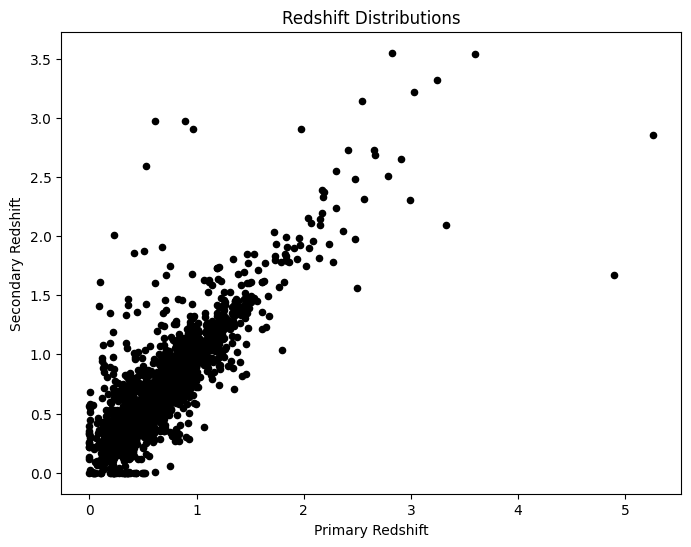

In [9]:
fig, ax1 = plt.subplots(nrows = 1)
df_merge.plot.scatter(
    x = 'photoz_1',
    y = 'photoz_2',
    ax = ax1,
    figsize = (8,6),
    grid = False,
    color = 'black',
)
ax1.set_title('Redshift Distributions')
ax1.set_xlabel('Primary Redshift')
ax1.set_ylabel('Secondary Redshift')
plt.show()

In [10]:
cos_red = df_merge[['SourceID', 'photoz_1', 'photoz_2']]

In [11]:
zs = cos_red.assign(redshift_sub = cos_red.apply(lambda row: row.photoz_1 - row.photoz_2, axis = 1))

In [12]:
real_mergers = zs.query('redshift_sub < 0.2 and redshift_sub > -0.2 ')[['SourceID', 'redshift_sub']]

In [13]:
len(real_mergers)

2462

In [14]:
df_merg = real_mergers.merge(df_merge, on = 'SourceID', how = 'left')

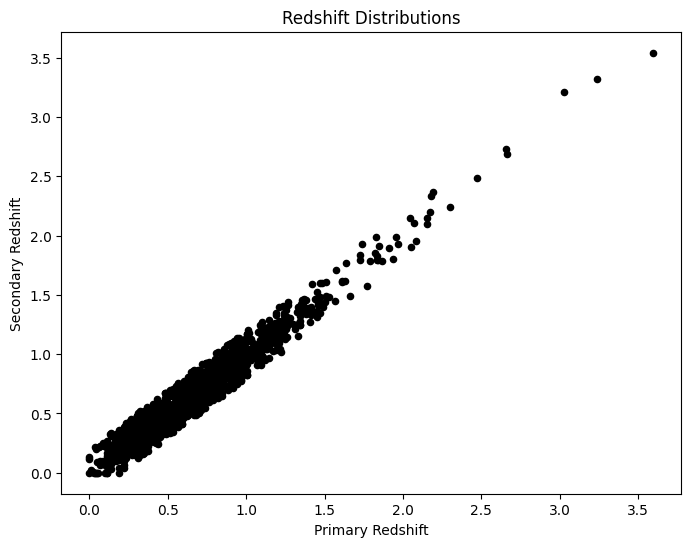

In [15]:
fig, ax1 = plt.subplots(nrows = 1)
df_merg.plot.scatter(
    x = 'photoz_1',
    y = 'photoz_2',
    ax = ax1,
    figsize = (8,6),
    grid = False,
    color = 'black',
)
ax1.set_title('Redshift Distributions')
ax1.set_xlabel('Primary Redshift')
ax1.set_ylabel('Secondary Redshift')
plt.show()

### Looking at Mass Distribution

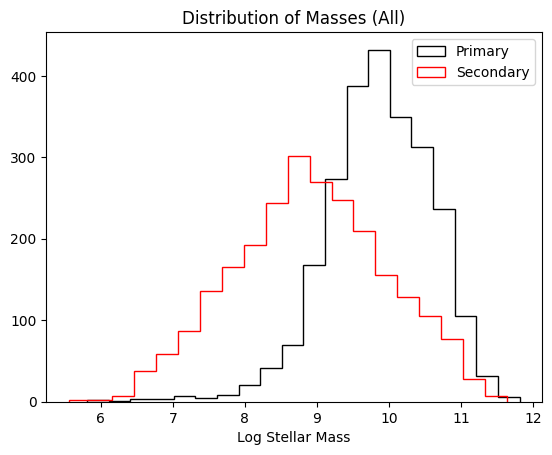

In [16]:
fig, ax1 = plt.subplots(nrows = 1)
df_merg.hist(
    column = ['mass_best_1'],
    ax = ax1,
    bins = 20,
    figsize = (6,8),
    grid = False,
    color = 'black',
    histtype='step',
    label = ['Primary'],
    sharex = True,
    sharey = True
)

df_merg.hist(
    column = ['mass_best_2'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'red',
    histtype='step',
    label = ['Secondary'],
    sharex = True,
    sharey = True
)


ax1.set_title('Distribution of Masses (All)')
ax1.set_xlabel('Log Stellar Mass')
plt.legend()
plt.show()

In [17]:
cosmo_cat_1 = df_merg.query('category=="stage1"')
cosmo_cat_2 = df_merg.query('category=="stage2"')
cosmo_cat_3 = df_merg.query('category=="stage3"')
cosmo_cat_4 = df_merg.query('category=="stage4"')

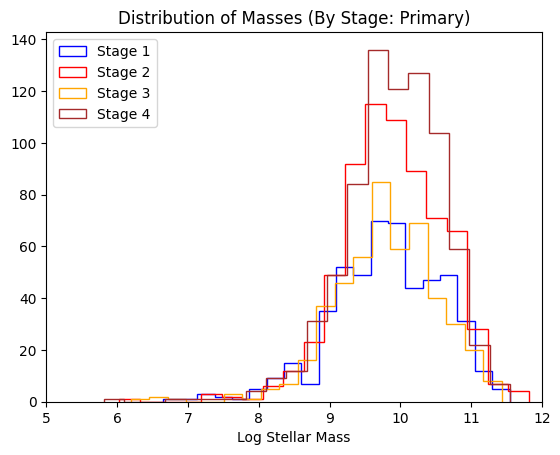

In [18]:
fig, ax1 = plt.subplots(nrows = 1)
cosmo_cat_1.hist(
    column = ['mass_best_1'],
    ax = ax1,
    bins = 20,
    figsize = (6,8),
    grid = False,
    color = 'blue',
    histtype='step',
    label = ['Stage 1'],
    sharex = True,
    sharey = True
)

cosmo_cat_2.hist(
    column = ['mass_best_1'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'red',
    histtype='step',
    label = ['Stage 2'],
    sharex = True,
    sharey = True
)

cosmo_cat_3.hist(
    column = ['mass_best_1'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'orange',
    histtype='step',
    label = ['Stage 3'],
    sharex = True,
    sharey = True
)

cosmo_cat_4.hist(
    column = ['mass_best_1'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'brown',
    histtype='step',
    label = ['Stage 4'],
    sharex = True,
    sharey = True
)

ax1.set_title('Distribution of Masses (By Stage: Primary)')
ax1.set_xlabel('Log Stellar Mass')
ax1.set_xlim([5,12])
plt.legend(loc = 'upper left')
plt.show()

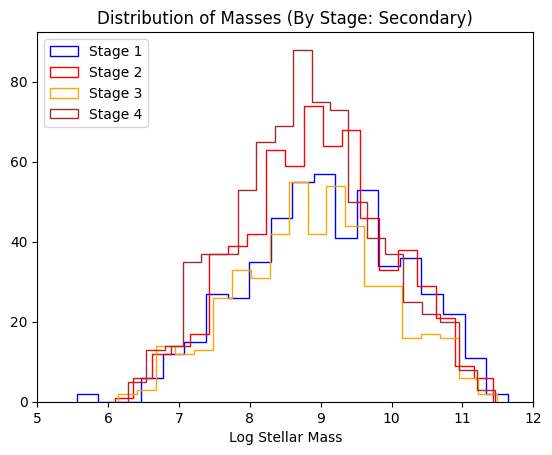

In [19]:
fig, ax1 = plt.subplots(nrows = 1)
cosmo_cat_1.hist(
    column = ['mass_best_2'],
    ax = ax1,
    bins = 20,
    figsize = (6,8),
    grid = False,
    color = 'blue',
    histtype='step',
    label = ['Stage 1'],
    sharex = True,
    sharey = True
)

cosmo_cat_2.hist(
    column = ['mass_best_2'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'red',
    histtype='step',
    label = ['Stage 2'],
    sharex = True,
    sharey = True
)

cosmo_cat_3.hist(
    column = ['mass_best_2'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'orange',
    histtype='step',
    label = ['Stage 3'],
    sharex = True,
    sharey = True
)

cosmo_cat_4.hist(
    column = ['mass_best_2'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'brown',
    histtype='step',
    label = ['Stage 4'],
    sharex = True,
    sharey = True
)

ax1.set_title('Distribution of Masses (By Stage: Secondary)')
ax1.set_xlabel('Log Stellar Mass')
ax1.set_xlim([5,12])
plt.legend(loc = 'upper left')
plt.show()

### Checking Mass Ratios

In [288]:
def calc_ratio(log_m1, log_m2):
    m1 = 10**log_m1
    m2 = 10**log_m2
    if m2/m1 <= 1:
        return m2 / m1
    else:
        return m1/m2

In [289]:
cosmo_ratio = (
    df_merg
    .assign(mass_ratio = df_merg.apply(lambda row: calc_ratio(row.mass_best_1, row.mass_best_2), axis = 1))
)

In [290]:
cosmo_rat_qur = cosmo_ratio.query('mass_ratio <= 100')

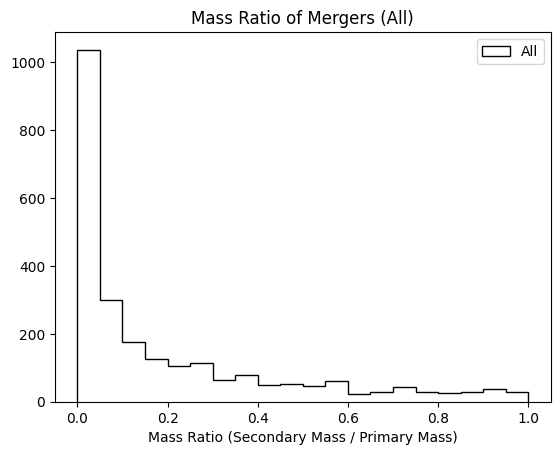

In [291]:
fig, ax1 = plt.subplots(nrows = 1)
cosmo_rat_qur.hist(
    column = ['mass_ratio'],
    ax = ax1,
    bins = 20,
    figsize = (6,8),
    grid = False,
    color = 'black',
    histtype='step',
    label = ['All'],
    sharex = True,
    sharey = True
)

ax1.set_title('Mass Ratio of Mergers (All)')
ax1.set_xlabel('Mass Ratio (Secondary Mass / Primary Mass)')
plt.legend()
plt.show()

In [293]:
tmp = len(cosmo_ratio.query('mass_ratio > 0.80')) / len(cosmo_ratio)
print(f'{tmp*100}% of this sample are major mergers of approximately 1:1 mass ratio.')

4.914703493095045% of this sample are major mergers of approximately 1:1 mass ratio.


In [294]:
cosmo_ratio_1 = cosmo_rat_qur.query('category == "stage1"')
cosmo_ratio_2 = cosmo_rat_qur.query('category == "stage2"')
cosmo_ratio_3 = cosmo_rat_qur.query('category == "stage3"')
cosmo_ratio_4 = cosmo_rat_qur.query('category == "stage4"')

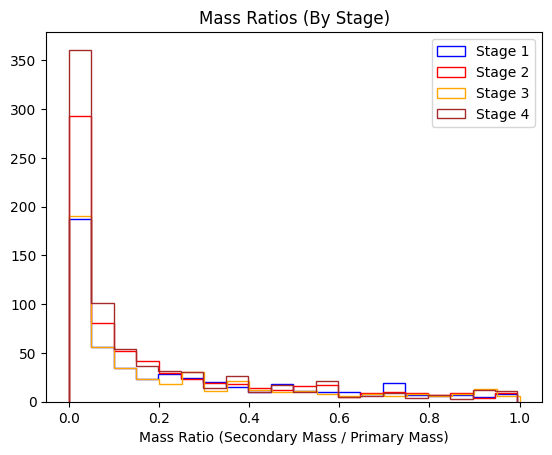

In [295]:
fig, ax1 = plt.subplots(nrows = 1)
cosmo_ratio_1.hist(
    column = ['mass_ratio'],
    ax = ax1,
    bins = 20,
    figsize = (6,8),
    grid = False,
    color = 'blue',
    histtype='step',
    label = ['Stage 1'],
    sharex = True,
    sharey = True
)

cosmo_ratio_2.hist(
    column = ['mass_ratio'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'red',
    histtype='step',
    label = ['Stage 2'],
    sharex = True,
    sharey = True
)

cosmo_ratio_3.hist(
    column = ['mass_ratio'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'orange',
    histtype='step',
    label = ['Stage 3'],
    sharex = True,
    sharey = True
)

cosmo_ratio_4.hist(
    column = ['mass_ratio'],
    ax = ax1,
    bins = 20,
    grid = False,
    color = 'brown',
    histtype='step',
    label = ['Stage 4'],
    sharex = True,
    sharey = True
)

ax1.set_title('Mass Ratios (By Stage)')
ax1.set_xlabel('Mass Ratio (Secondary Mass / Primary Mass)')
plt.legend()
plt.show()

### Linking Star Formation and Stage

In [296]:
cosmo_ratio.columns

Index(['SourceID', 'redshift_sub', 'id_1', 'ssfr_best_1', 'ssfr_med_max68_1',
       'ssfr_med_min68_1', 'ssfr_med_1', 'sfr_best_1', 'sfr_med_max68_1',
       'sfr_med_min68_1', 'sfr_med_1', 'mass_best_1', 'mass_med_max68_1',
       'mass_med_min68_1', 'mass_med_1', 'age_1', 'type_1', 'photoz_1',
       'flag_deep_1', 'flag_shallow_1', 'l_r_1', 'l_k_1', 'l_nu_1', 'dist_1',
       'id_2', 'ssfr_best_2', 'ssfr_med_max68_2', 'ssfr_med_min68_2',
       'ssfr_med_2', 'sfr_best_2', 'sfr_med_max68_2', 'sfr_med_min68_2',
       'sfr_med_2', 'mass_best_2', 'mass_med_max68_2', 'mass_med_min68_2',
       'mass_med_2', 'age_2', 'type_2', 'photoz_2', 'flag_deep_2',
       'flag_shallow_2', 'l_r_2', 'l_k_2', 'l_nu_2', 'dist_2', 'RA', 'Dec',
       'int_prediction', 'references', 'status', 'category', 'mass_ratio'],
      dtype='object')

In [297]:
cosmo_ratio.sfr_best_2.max()

2.475

In [298]:
def categ_merger(ratio):
    if ratio > 1:
        test = 1/ratio
    if ratio > 0.10:
        return 'major'
    elif ratio <= 0.10 and ratio > 0.001:
        return 'minor'
    else:
        return 'micro'

In [299]:
cosmo_clsf = (
    cosmo_ratio
    .assign(merger_type = cosmo_ratio.mass_ratio.apply(lambda x: categ_merger(x)))
)

In [300]:
cosmo_clsf_1 = cosmo_clsf.query('category == "stage1"')
cosmo_clsf_2 = cosmo_clsf.query('category == "stage2"')
cosmo_clsf_3 = cosmo_clsf.query('category == "stage3"')
cosmo_clsf_4 = cosmo_clsf.query('category == "stage4"')

In [301]:
cosmo_clsf

,SourceID,redshift_sub,id_1,ssfr_best_1,ssfr_med_max68_1,ssfr_med_min68_1,ssfr_med_1,sfr_best_1,sfr_med_max68_1,sfr_med_min68_1,...,l_nu_2,dist_2,RA,Dec,int_prediction,references,status,category,mass_ratio,merger_type
0,4000705532455,0.170,590539.0,-8.847,-8.463,-8.865,-8.712,0.508,0.835,0.477,...,27.074,9.361438,150.679664,2.196615,0.970096,['2007ApJS..172...99C'],Referenced,NaN,0.018030,minor
1,4000705533312,-0.026,621053.0,-10.258,-10.232,-10.368,-10.300,-0.058,-0.032,-0.168,...,28.661,2.627196,150.667975,2.242945,0.995066,"['2007ApJS..172...99C', '2007ApJS..172...99C',...",Referenced,stage3,0.274157,major
2,4000705533383,-0.135,617834.0,-9.445,-9.322,-9.470,-9.398,0.132,0.179,0.034,...,29.135,2.241379,150.645125,2.237650,0.985773,"['2007ApJS..172...99C', '2007ApJS..172...99C',...",Referenced,stage1,0.797995,major
3,4000705539529,-0.136,882817.0,-8.783,-8.753,-9.122,-8.868,1.319,1.346,1.025,...,28.323,3.301196,149.686626,2.637161,0.992917,"['2009ApJS..184..218L', '2007ApJS..172...99C']",Referenced,stage1,0.082985,minor
4,4000705539941,-0.135,893328.0,-9.673,-9.646,-9.798,-9.730,-1.016,-0.938,-1.135,...,27.618,5.171943,149.702652,2.654624,0.999233,"['2008ApJS..175..128S', '2007ApJS..172...99C',...",Referenced,stage2,0.130617,major
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,6000536184828,0.043,862874.0,-9.289,-9.232,-9.699,-9.380,1.425,1.441,1.170,...,27.540,7.638679,150.481099,2.605585,0.997448,['2007ApJS..172...99C'],Referenced,stage4,0.001799,minor
2458,6000536185304,0.058,887383.0,-9.725,-9.632,-9.769,-9.701,1.216,1.268,1.132,...,28.699,9.098925,150.471491,2.648468,0.988194,"['2007ApJS..172...99C', '2007ApJS..172...99C']",Referenced,stage4,0.024322,minor
2459,6000536185496,-0.124,898134.0,-9.248,-8.910,-9.279,-9.164,0.670,0.918,0.557,...,27.942,9.743745,150.500839,2.662972,0.965257,"['2007ApJS..172...99C', '2007ApJS..172...99C']",Referenced,stage1,0.028445,minor
2460,6000536185585,0.057,904074.0,-8.617,-8.532,-8.670,-8.601,1.241,1.368,1.230,...,27.326,2.636796,150.487245,2.671166,0.993414,"['2007ApJS..172...99C', '2018ApJ...858...77H',...",Referenced,stage3,0.004436,minor


In [302]:
cosmo_clsf.merger_type.value_counts()

minor    1290
major    1125
micro      47
Name: merger_type, dtype: int64

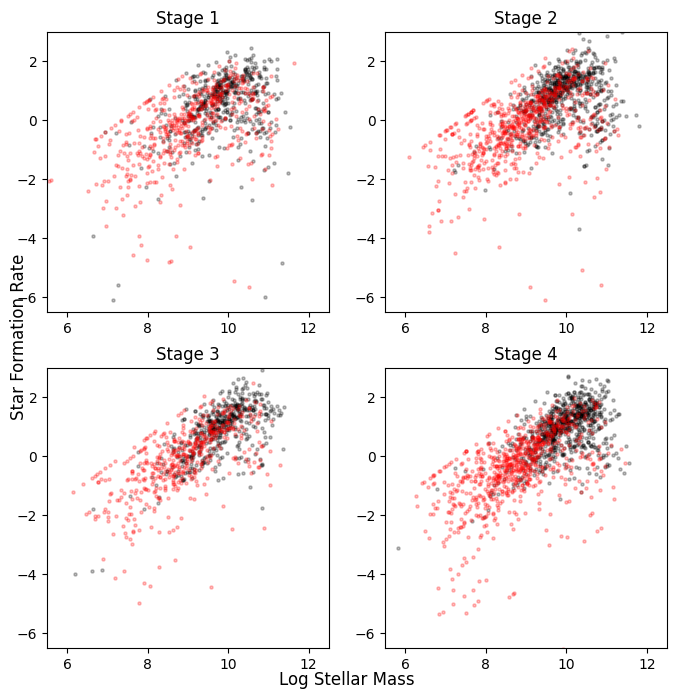

In [303]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
axs[0,0].scatter(list(cosmo_clsf_1.mass_best_1), list(cosmo_clsf_1.sfr_best_1), s = 5, color='black', marker = 'o', alpha = 0.25)
axs[0,0].scatter(list(cosmo_clsf_1.mass_best_2), list(cosmo_clsf_1.sfr_best_2), s = 5, color='red', marker = 'o', alpha = 0.25)
axs[0,0].set_xlim([5.5, 12.5])
axs[0,0].set_ylim([-6.5, 3])
axs[0,0].set_title('Stage 1')

axs[0,1].scatter(list(cosmo_clsf_2.mass_best_1), list(cosmo_clsf_2.sfr_best_1), s = 5, color='black', marker = 'o', alpha = 0.25)
axs[0,1].scatter(list(cosmo_clsf_2.mass_best_2), list(cosmo_clsf_2.sfr_best_2), s = 5, color='red', marker = 'o', alpha = 0.25)
axs[0,1].set_xlim([5.5, 12.5])
axs[0,1].set_ylim([-6.5, 3])
axs[0,1].set_title('Stage 2')

axs[1,0].scatter(list(cosmo_clsf_3.mass_best_1), list(cosmo_clsf_3.sfr_best_1), s = 5, color='black', marker = 'o', alpha = 0.25)
axs[1,0].scatter(list(cosmo_clsf_3.mass_best_2), list(cosmo_clsf_3.sfr_best_2), s = 5, color='red', marker = 'o', alpha = 0.25)
axs[1,0].set_xlim([5.5, 12.5])
axs[1,0].set_ylim([-6.5, 3])
axs[1,0].set_title('Stage 3')

axs[1,1].scatter(list(cosmo_clsf_4.mass_best_1), list(cosmo_clsf_4.sfr_best_1), s = 5, color='black', marker = 'o', alpha = 0.25)
axs[1,1].scatter(list(cosmo_clsf_4.mass_best_2), list(cosmo_clsf_4.sfr_best_2), s = 5, color='red', marker = 'o', alpha = 0.25)
axs[1,1].set_xlim([5.5, 12.5])
axs[1,1].set_ylim([-6.5, 3])
axs[1,1].set_title('Stage 4')

fig.text(0.5, 0.07, 'Log Stellar Mass', ha='center', va='center', fontsize = 12)
fig.text(0.09, 0.5, 'Star Formation Rate', ha='center', va='center', rotation='vertical', fontsize = 12)
plt.show()

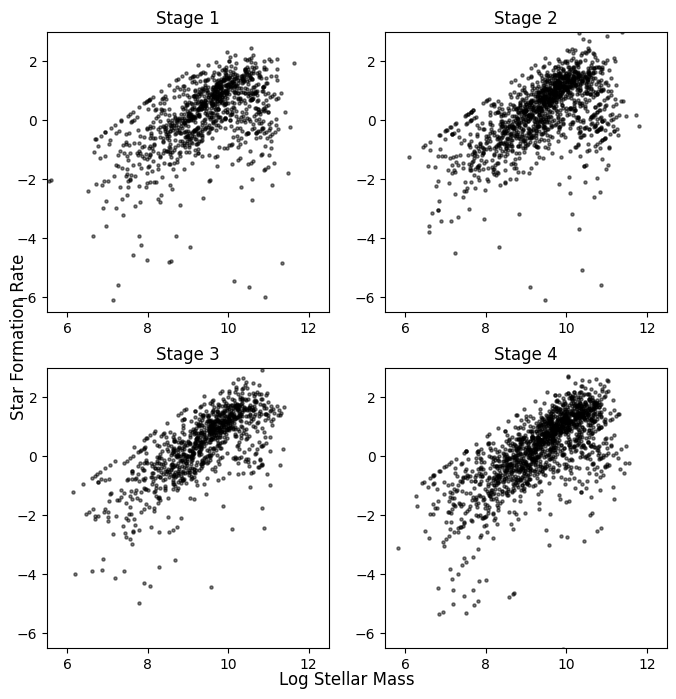

In [304]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
axs[0,0].scatter(list(cosmo_clsf_1.mass_best_1), list(cosmo_clsf_1.sfr_best_1), s = 5, color='black', marker = 'o', alpha = 0.5)
axs[0,0].scatter(list(cosmo_clsf_1.mass_best_2), list(cosmo_clsf_1.sfr_best_2), s = 5, color='black', marker = 'o', alpha = 0.5)
axs[0,0].set_xlim([5.5, 12.5])
axs[0,0].set_ylim([-6.5, 3])
axs[0,0].set_title('Stage 1')

axs[0,1].scatter(list(cosmo_clsf_2.mass_best_1), list(cosmo_clsf_2.sfr_best_1), s = 5, color='black', marker = 'o', alpha = 0.5)
axs[0,1].scatter(list(cosmo_clsf_2.mass_best_2), list(cosmo_clsf_2.sfr_best_2), s = 5, color='black', marker = 'o', alpha = 0.5)
axs[0,1].set_xlim([5.5, 12.5])
axs[0,1].set_ylim([-6.5, 3])
axs[0,1].set_title('Stage 2')

axs[1,0].scatter(list(cosmo_clsf_3.mass_best_1), list(cosmo_clsf_3.sfr_best_1), s = 5, color='black', marker = 'o', alpha = 0.5)
axs[1,0].scatter(list(cosmo_clsf_3.mass_best_2), list(cosmo_clsf_3.sfr_best_2), s = 5, color='black', marker = 'o', alpha = 0.5)
axs[1,0].set_xlim([5.5, 12.5])
axs[1,0].set_ylim([-6.5, 3])
axs[1,0].set_title('Stage 3')

axs[1,1].scatter(list(cosmo_clsf_4.mass_best_1), list(cosmo_clsf_4.sfr_best_1), s = 5, color='black', marker = 'o', alpha = 0.5)
axs[1,1].scatter(list(cosmo_clsf_4.mass_best_2), list(cosmo_clsf_4.sfr_best_2), s = 5, color='black', marker = 'o', alpha = 0.5)
axs[1,1].set_xlim([5.5, 12.5])
axs[1,1].set_ylim([-6.5, 3])
axs[1,1].set_title('Stage 4')

fig.text(0.5, 0.07, 'Log Stellar Mass', ha='center', va='center', fontsize = 12)
fig.text(0.09, 0.5, 'Star Formation Rate', ha='center', va='center', rotation='vertical', fontsize = 12)
plt.show()

### Binning by Redshift

In [305]:
cosmo_clsf.head()

,SourceID,redshift_sub,id_1,ssfr_best_1,ssfr_med_max68_1,ssfr_med_min68_1,ssfr_med_1,sfr_best_1,sfr_med_max68_1,sfr_med_min68_1,...,l_nu_2,dist_2,RA,Dec,int_prediction,references,status,category,mass_ratio,merger_type
0,4000705532455,0.170,590539.0,-8.847,-8.463,-8.865,-8.712,0.508,0.835,0.477,...,27.074,9.361438,150.679664,2.196615,0.970096,['2007ApJS..172...99C'],Referenced,NaN,0.018030,minor
1,4000705533312,-0.026,621053.0,-10.258,-10.232,-10.368,-10.300,-0.058,-0.032,-0.168,...,28.661,2.627196,150.667975,2.242945,0.995066,"['2007ApJS..172...99C', '2007ApJS..172...99C',...",Referenced,stage3,0.274157,major
2,4000705533383,-0.135,617834.0,-9.445,-9.322,-9.470,-9.398,0.132,0.179,0.034,...,29.135,2.241379,150.645125,2.237650,0.985773,"['2007ApJS..172...99C', '2007ApJS..172...99C',...",Referenced,stage1,0.797995,major
3,4000705539529,-0.136,882817.0,-8.783,-8.753,-9.122,-8.868,1.319,1.346,1.025,...,28.323,3.301196,149.686626,2.637161,0.992917,"['2009ApJS..184..218L', '2007ApJS..172...99C']",Referenced,stage1,0.082985,minor
4,4000705539941,-0.135,893328.0,-9.673,-9.646,-9.798,-9.730,-1.016,-0.938,-1.135,...,27.618,5.171943,149.702652,2.654624,0.999233,"['2008ApJS..175..128S', '2007ApJS..172...99C',...",Referenced,stage2,0.130617,major


In [306]:
redshift_bins = [0,0.25,0.5, 0.75, 1]

In [307]:
def assign_bin(z, redshift_bins):
    # z < 0.25
    if z <= redshift_bins[1]:
        return 0
    # 0.25 < z < 0.5
    elif z > redshift_bins[1] and z <= redshift_bins[2]:
        return 1
    # 0.5 < z < 0.75
    elif z > redshift_bins[2] and z <= redshift_bins[3]:
        return 2
    # 0.75 z < 1
    elif z > redshift_bins[3] and z <= redshift_bins[4]:
        return 3
    else:
        return None

In [308]:
cosmo_redshift = (
    cosmo_clsf
    .assign(z_bin = cosmo_clsf.photoz_1.apply(lambda x: assign_bin(x, redshift_bins)))
)

In [309]:
cosmo_redshift_1 = cosmo_redshift.query('z_bin == 0')
cosmo_redshift_2 = cosmo_redshift.query('z_bin == 1')
cosmo_redshift_3 = cosmo_redshift.query('z_bin == 2')
cosmo_redshift_4 = cosmo_redshift.query('z_bin == 3')

In [310]:
cosmo_redshift_1_1 = cosmo_redshift_1.query('category == "stage1"')
cosmo_redshift_1_2 = cosmo_redshift_2.query('category == "stage2"')
cosmo_redshift_1_3 = cosmo_redshift_3.query('category == "stage3"')
cosmo_redshift_1_4 = cosmo_redshift_4.query('category == "stage4"')

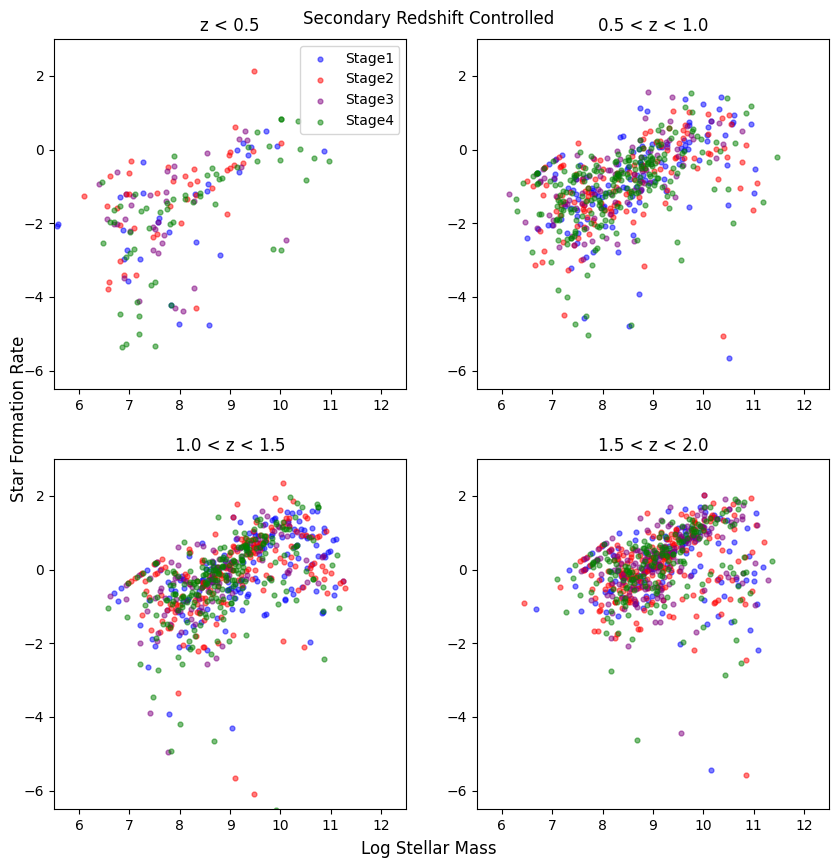

In [311]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)

##### First Subplot

cosmo_redshift_1.query('category == "stage1"').plot.scatter(
    x = 'mass_best_2',
    y = 'sfr_best_2',
    ax = axes[0,0],
    # label = 'stage1',
    color='blue',
    s = 12,
    alpha = 0.5,
    marker = 'o',
    xlabel = '',
    ylabel = '',
    label = 'Stage1'
)

cosmo_redshift_1.query('category == "stage2"').plot.scatter(
    x = 'mass_best_2',
    y = 'sfr_best_2',
    ax = axes[0,0],
    # label = 'stage1',
    color='red',
    s = 12,
    alpha = 0.5,
    marker = 'o',
    xlabel = '',
    ylabel = '',
    label = 'Stage2'
)

cosmo_redshift_1.query('category == "stage3"').plot.scatter(
    x = 'mass_best_2',
    y = 'sfr_best_2',
    ax = axes[0,0],
    # label = 'stage1',
    color='purple',
    s = 12,
    alpha = 0.5,
    marker = 'o',
    xlabel = '',
    ylabel = '',
    label = 'Stage3'
)

cosmo_redshift_1.query('category == "stage4"').plot.scatter(
    x = 'mass_best_2',
    y = 'sfr_best_2',
    ax = axes[0,0],
    # label = 'stage1',
    color='green',
    s = 12,
    alpha = 0.5,
    marker = 'o',
    xlabel = '',
    ylabel = '',
    label = 'Stage4'
)

axes[0,0].legend()

##### Second Subplot
cosmo_redshift_2.query('category == "stage1"').plot.scatter(
    x = 'mass_best_2',
    y = 'sfr_best_2',
    ax = axes[0,1],
    # label = 'stage1',
    color='blue',
    s = 12,
    alpha = 0.5,
    marker = 'o',
    xlabel = '',
    ylabel = ''
)

cosmo_redshift_2.query('category == "stage2"').plot.scatter(
    x = 'mass_best_2',
    y = 'sfr_best_2',
    ax = axes[0,1],
    # label = 'stage1',
    color='red',
    s = 12,
    alpha = 0.5,
    marker = 'o',
    xlabel = '',
    ylabel = ''
)

cosmo_redshift_2.query('category == "stage3"').plot.scatter(
    x = 'mass_best_2',
    y = 'sfr_best_2',
    ax = axes[0,1],
    # label = 'stage1',
    color='purple',
    s = 12,
    alpha = 0.5,
    marker = 'o',
    xlabel = '',
    ylabel = ''
)

cosmo_redshift_2.query('category == "stage4"').plot.scatter(
    x = 'mass_best_2',
    y = 'sfr_best_2',
    ax = axes[0,1],
    # label = 'stage1',
    color='green',
    s = 12,
    alpha = 0.5,
    marker = 'o',
    xlabel = '',
    ylabel = ''
)

###### Third Subplot
cosmo_redshift_3.query('category == "stage1"').plot.scatter(
    x = 'mass_best_2',
    y = 'sfr_best_2',
    ax = axes[1,0],
    # label = 'stage1',
    color='blue',
    s = 12,
    alpha = 0.5,
    marker = 'o',
    xlabel = '',
    ylabel = ''
)

cosmo_redshift_3.query('category == "stage2"').plot.scatter(
    x = 'mass_best_2',
    y = 'sfr_best_2',
    ax = axes[1,0],
    # label = 'stage1',
    color='red',
    s = 12,
    alpha = 0.5,
    marker = 'o',
    xlabel = '',
    ylabel = ''
)

cosmo_redshift_3.query('category == "stage3"').plot.scatter(
    x = 'mass_best_2',
    y = 'sfr_best_2',
    ax = axes[1,0],
    # label = 'stage1',
    color='purple',
    s = 12,
    alpha = 0.5,
    marker = 'o',
    xlabel = '',
    ylabel = ''
)

cosmo_redshift_3.query('category == "stage4"').plot.scatter(
    x = 'mass_best_2',
    y = 'sfr_best_2',
    ax = axes[1,0],
    # label = 'stage1',
    color='green',
    s = 12,
    alpha = 0.5,
    marker = 'o',
    xlabel = '',
    ylabel = ''
)

###### Fourth Subplot
cosmo_redshift_4.query('category == "stage1"').plot.scatter(
    x = 'mass_best_2',
    y = 'sfr_best_2',
    ax = axes[1,1],
    # label = 'stage1',
    color='blue',
    s = 12,
    alpha = 0.5,
    marker = 'o',
    xlabel = '',
    ylabel = ''
)

cosmo_redshift_4.query('category == "stage2"').plot.scatter(
    x = 'mass_best_2',
    y = 'sfr_best_2',
    ax = axes[1,1],
    # label = 'stage1',
    color='red',
    s = 12,
    alpha = 0.5,
    marker = 'o',
    xlabel = '',
    ylabel = ''
)

cosmo_redshift_4.query('category == "stage3"').plot.scatter(
    x = 'mass_best_2',
    y = 'sfr_best_2',
    ax = axes[1,1],
    # label = 'stage1',
    color='purple',
    s = 12,
    alpha = 0.5,
    marker = 'o',
    xlabel = '',
    ylabel = ''
)

cosmo_redshift_4.query('category == "stage4"').plot.scatter(
    x = 'mass_best_2',
    y = 'sfr_best_2',
    ax = axes[1,1],
    # label = 'stage1',
    color='green',
    s = 12,
    alpha = 0.5,
    marker = 'o',
    xlabel = '',
    ylabel = '',
    figsize = (10,10)
)

axes[0,0].set_xlim([5.5, 12.5])
axes[0,0].set_ylim([-6.5, 3])
axes[1,0].set_xlim([5.5, 12.5])
axes[1,0].set_ylim([-6.5, 3])
axes[0,1].set_xlim([5.5, 12.5])
axes[0,1].set_ylim([-6.5, 3])
axes[1,1].set_xlim([5.5, 12.5])
axes[1,1].set_ylim([-6.5, 3])

axes[0,0].set_title('z < 0.5')
axes[0,1].set_title('0.5 < z < 1.0')
axes[1,0].set_title('1.0 < z < 1.5')
axes[1,1].set_title('1.5 < z < 2.0')

fig.text(0.5, 0.90, 'Secondary Redshift Controlled', ha='center', va='center', fontsize = 12)
fig.text(0.5, 0.07, 'Log Stellar Mass', ha='center', va='center', fontsize = 12)
fig.text(0.09, 0.5, 'Star Formation Rate', ha='center', va='center', rotation='vertical', fontsize = 12)
plt.show()

### Summing Masses and Star Formation Rates

In [312]:
cosmo_dna = cosmo_redshift.dropna()

In [313]:
cosmo_dna.head()

,SourceID,redshift_sub,id_1,ssfr_best_1,ssfr_med_max68_1,ssfr_med_min68_1,ssfr_med_1,sfr_best_1,sfr_med_max68_1,sfr_med_min68_1,...,dist_2,RA,Dec,int_prediction,references,status,category,mass_ratio,merger_type,z_bin
1,4000705533312,-0.026,621053.0,-10.258,-10.232,-10.368,-10.300,-0.058,-0.032,-0.168,...,2.627196,150.667975,2.242945,0.995066,"['2007ApJS..172...99C', '2007ApJS..172...99C',...",Referenced,stage3,0.274157,major,1.0
2,4000705533383,-0.135,617834.0,-9.445,-9.322,-9.470,-9.398,0.132,0.179,0.034,...,2.241379,150.645125,2.237650,0.985773,"['2007ApJS..172...99C', '2007ApJS..172...99C',...",Referenced,stage1,0.797995,major,2.0
3,4000705539529,-0.136,882817.0,-8.783,-8.753,-9.122,-8.868,1.319,1.346,1.025,...,3.301196,149.686626,2.637161,0.992917,"['2009ApJS..184..218L', '2007ApJS..172...99C']",Referenced,stage1,0.082985,minor,2.0
4,4000705539941,-0.135,893328.0,-9.673,-9.646,-9.798,-9.730,-1.016,-0.938,-1.135,...,5.171943,149.702652,2.654624,0.999233,"['2008ApJS..175..128S', '2007ApJS..172...99C',...",Referenced,stage2,0.130617,major,0.0
5,4000705540005,-0.027,893797.0,-9.673,-9.615,-9.793,-9.713,-0.793,-0.706,-0.874,...,5.912166,149.722435,2.657182,0.974112,"['2007ApJS..172...99C', '2007ApJS..172...99C',...",Referenced,stage3,0.030269,minor,1.0


In [314]:
df_prep = cosmo_dna[['SourceID', 'mass_best_1', 'mass_best_2', 'sfr_best_1', 'sfr_best_2', 'photoz_1', 'photoz_2', 'z_bin', 'category', 'merger_type']]

In [315]:
def adding_log(logx1, logx2):
    x1 = 10**(logx1)
    x2 = 10**(logx2)
    x = x1 + x2
    logx = np.log10(x)
    return logx

In [316]:
df_sum = (
    cosmo_dna
    .assign(mass_sum = cosmo_dna.apply(lambda row: adding_log(row.mass_best_1, row.mass_best_2), axis = 1))
    .assign(sfr_sum = cosmo_dna.apply(lambda row: adding_log(row.sfr_best_1, row.sfr_best_2), axis = 1))
)

<AxesSubplot:xlabel='Log(M1 + M2)', ylabel='Log(SFR1 + SFR2)'>

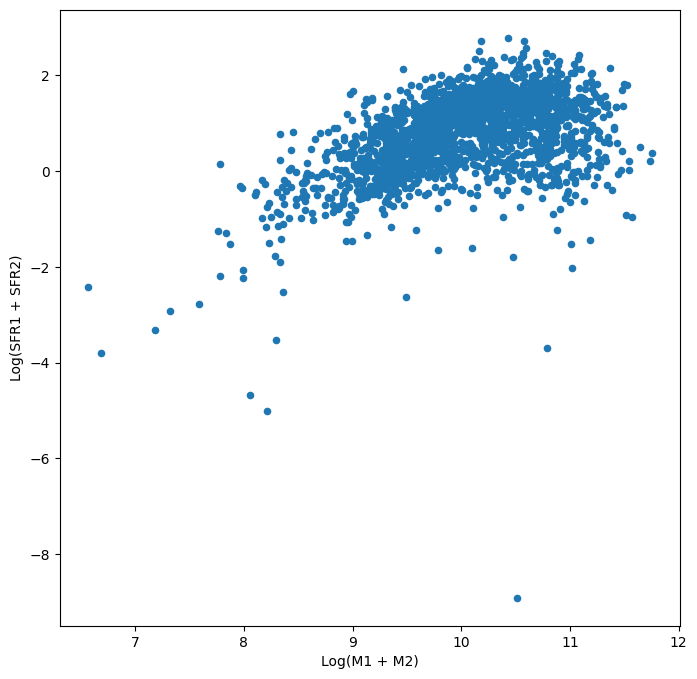

In [317]:
df_sum.plot.scatter(
    x = 'mass_sum',
    y = 'sfr_sum',
    xlabel = 'Log(M1 + M2)',
    ylabel = 'Log(SFR1 + SFR2)',
    figsize = (8,8)
)

In [318]:
def create_plot(df, ax, stage, control):
    df.plot.scatter(
        x = 'mass_sum',
        y = 'sfr_sum',
        ax = ax,
        xlim = [5,12.5],
        ylim = [-5.5, 3.5],
        xlabel = '',
        ylabel = '',
        title = f'{control} {stage}',
        color = 'black',
        alpha = 0.25,
        s = 5
    )

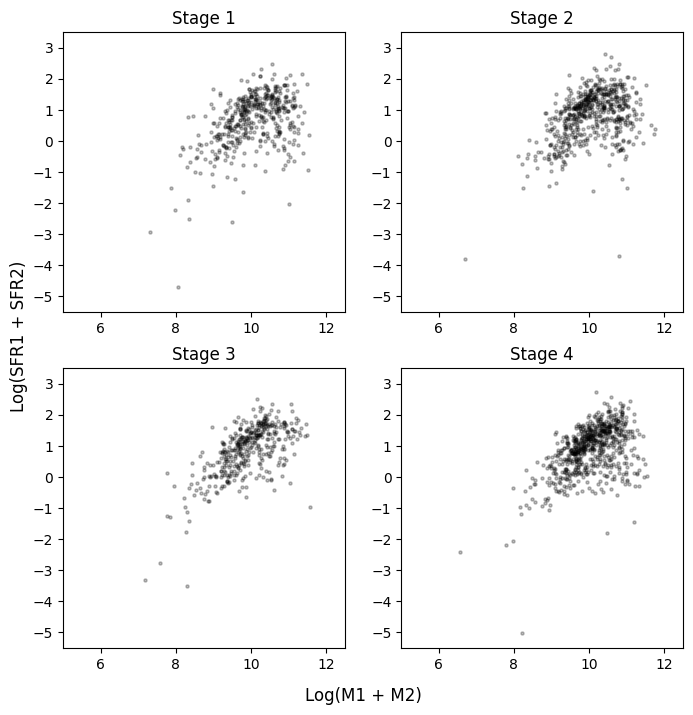

In [319]:
counter = 1
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot(df_sum.query(f'category == "stage{counter}"'), axes[i,j], counter, 'Stage')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M1 + M2)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(SFR1 + SFR2)', ha='center', va='center', rotation='vertical', fontsize = 12)

plt.show()

Below: redshift_bins = [0,0.25,0.5, 0.75, 1]

    Redshift Bin 0 : z < 0.25
    Redshift Bin 1 : 0.25 < z < 0.5
    Redshift Bin 2 : 0.5 < z < 0.75
    Redshift Bin 3 : 0.75 < z < 1

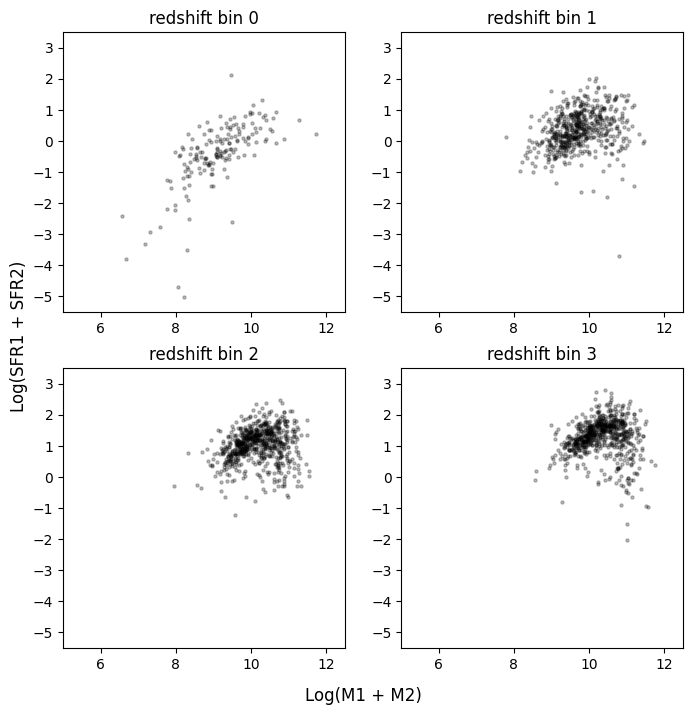

In [320]:
counter = 0
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot(df_sum.query(f'z_bin == @counter'), axes[i,j], counter, 'redshift bin')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M1 + M2)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(SFR1 + SFR2)', ha='center', va='center', rotation='vertical', fontsize = 12)

plt.show()

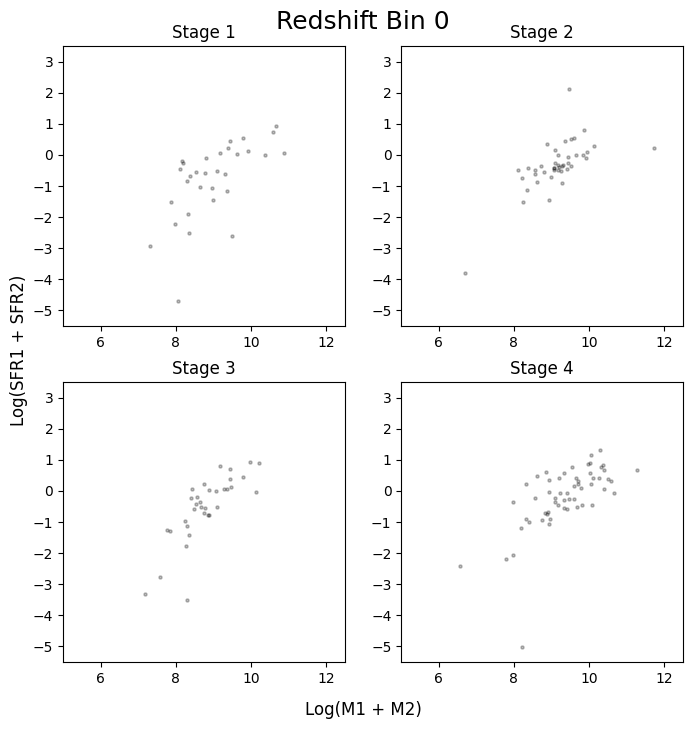

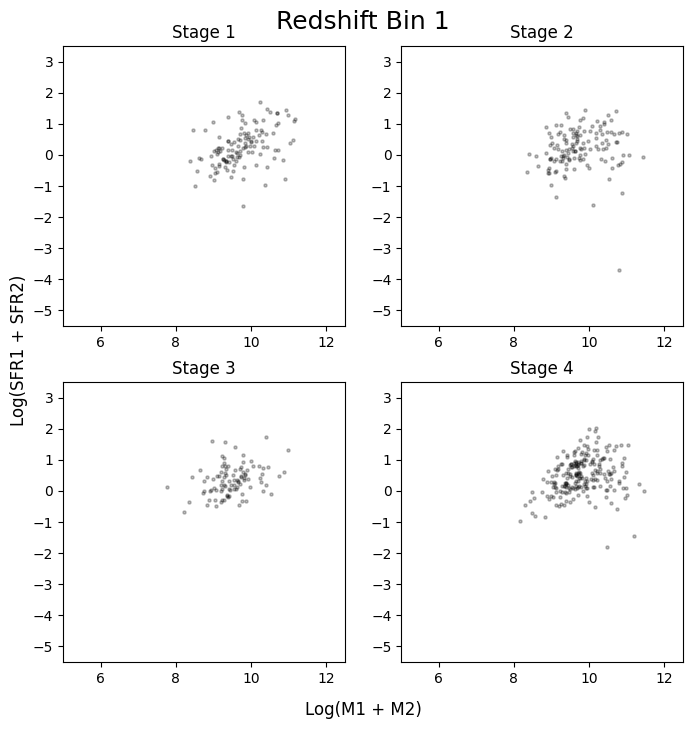

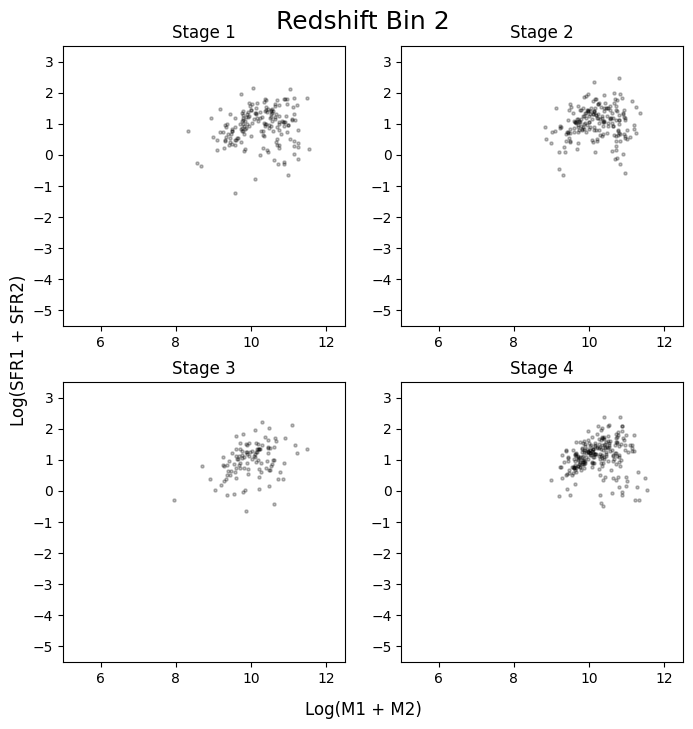

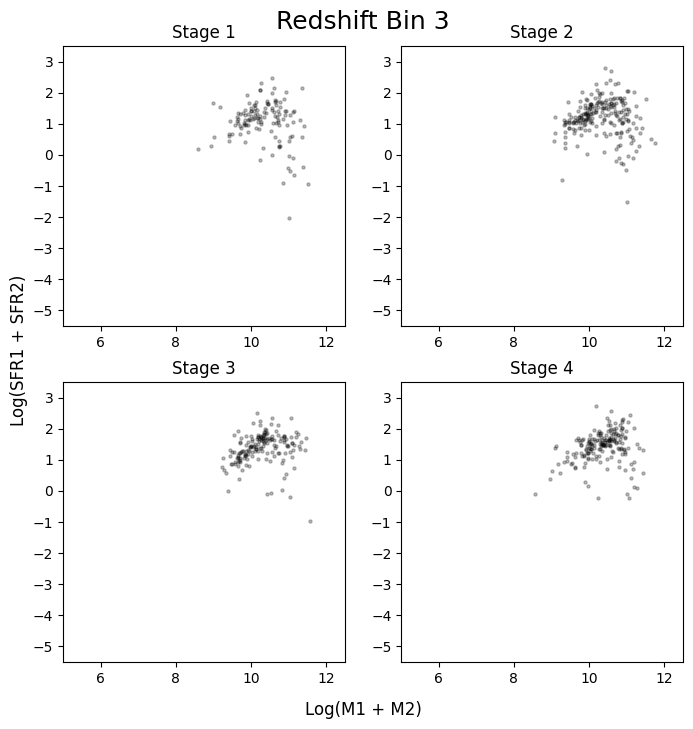

In [321]:
for p in range(4):
    df_tmp = df_sum.query('z_bin == @p')
    counter = 1
    fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
    for i in range(2):
        for j in range(2):
            create_plot(df_tmp.query(f'category == "stage{counter}"'), axes[i,j], counter, 'Stage')
            counter += 1

    fig.text(0.5, 0.05, 'Log(M1 + M2)', ha='center', va='center', fontsize = 12)
    fig.text(0.07, 0.5, 'Log(SFR1 + SFR2)', ha='center', va='center', rotation='vertical', fontsize = 12)
    fig.text(0.5, 0.91, f'Redshift Bin {p}', ha='center', va='center', fontsize = 18)

    plt.show()

### Binning by Merger Type

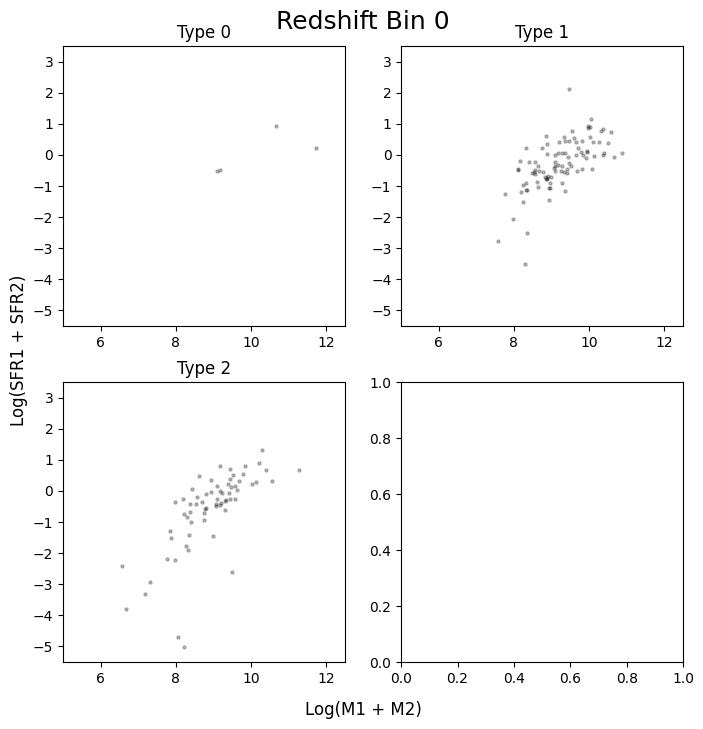

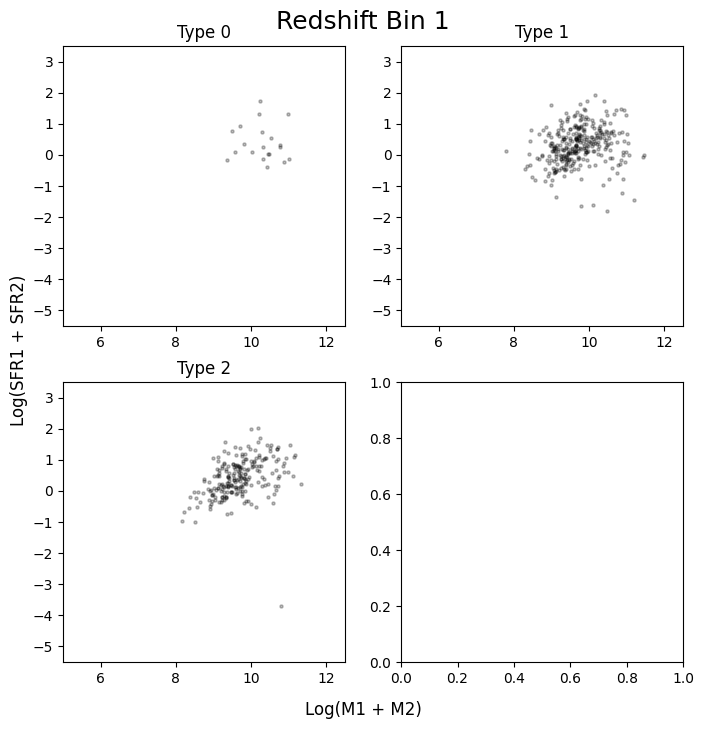

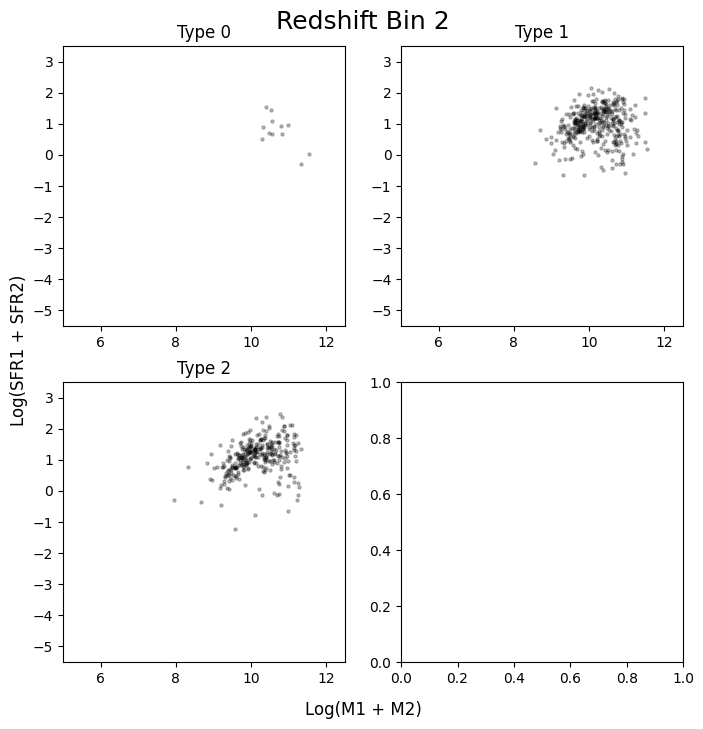

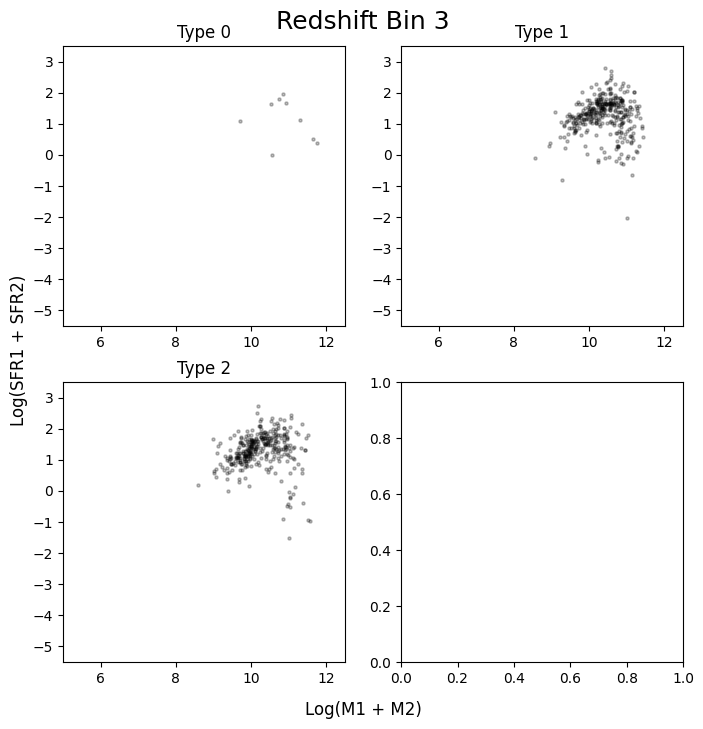

In [322]:
all_types = ['micro', 'minor', 'major']
for p in range(4):
    df_tmp = df_sum.query('z_bin == @p')
    counter = 0
    fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
    for i in range(2):
        for j in range(2):
            if counter > len(all_types)-1:
                continue
            m_type = all_types[counter]
            create_plot(df_tmp.query(f'merger_type == @m_type'), axes[i,j], counter, 'Type')
            counter += 1

    fig.text(0.5, 0.05, 'Log(M1 + M2)', ha='center', va='center', fontsize = 12)
    fig.text(0.07, 0.5, 'Log(SFR1 + SFR2)', ha='center', va='center', rotation='vertical', fontsize = 12)
    fig.text(0.5, 0.91, f'Redshift Bin {p}', ha='center', va='center', fontsize = 18)

    plt.show()

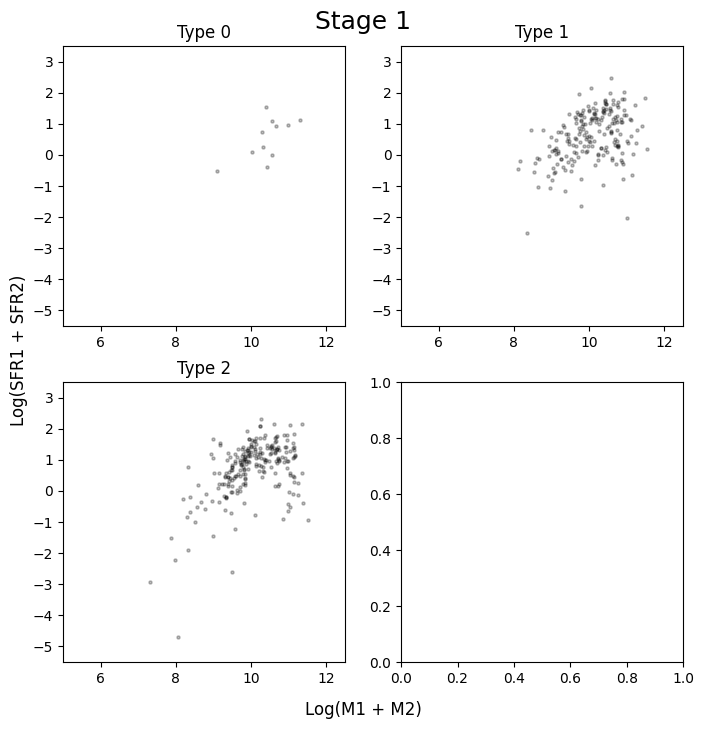

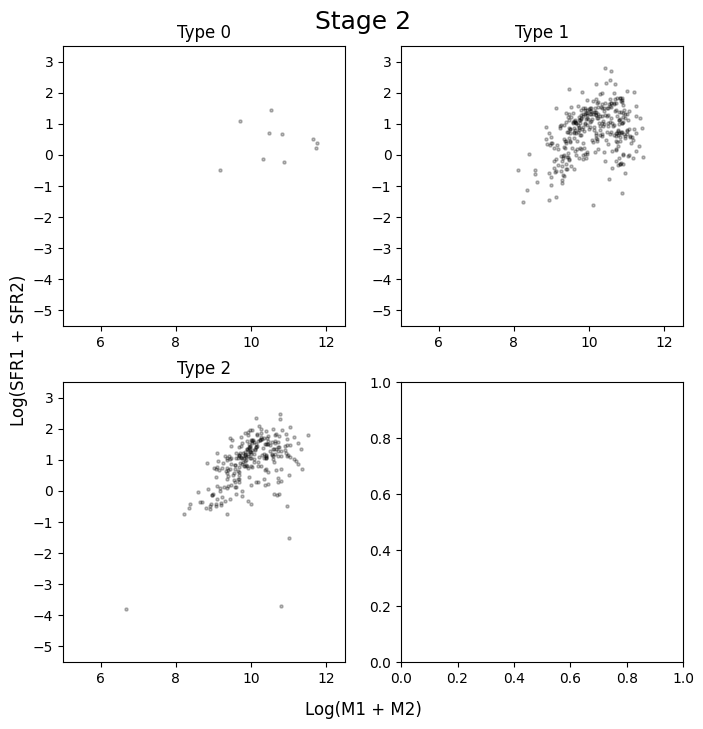

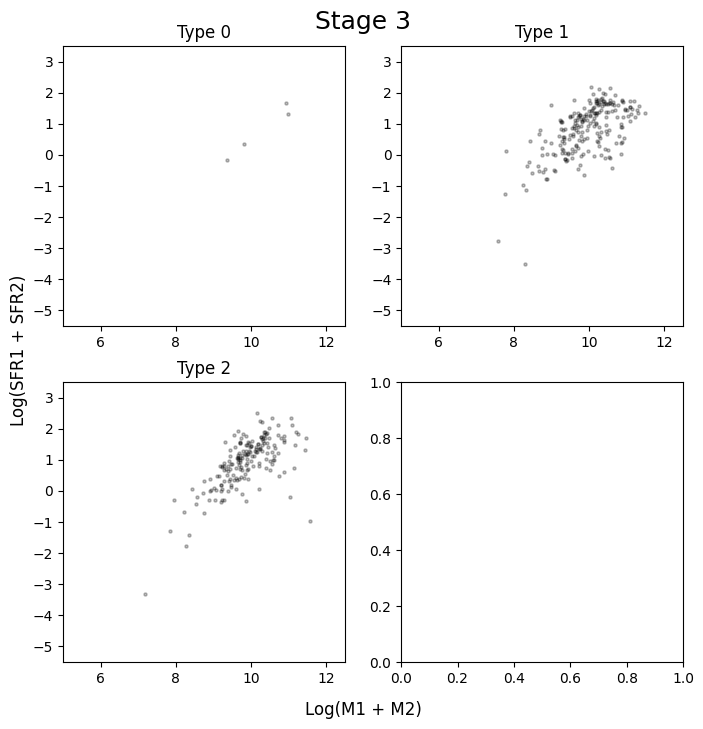

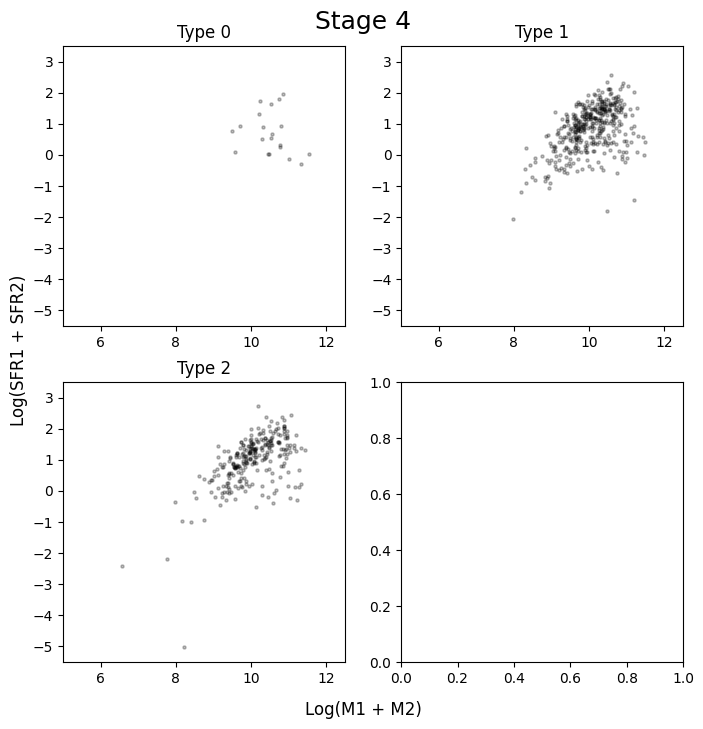

In [323]:
all_types = ['micro', 'minor', 'major']
for p in range(4):
    df_tmp = df_sum.query(f'category == "stage{p+1}"')
    counter = 0
    fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
    for i in range(2):
        for j in range(2):
            if counter > len(all_types)-1:
                continue
            m_type = all_types[counter]
            create_plot(df_tmp.query(f'merger_type == @m_type'), axes[i,j], counter, 'Type')
            counter += 1

    fig.text(0.5, 0.05, 'Log(M1 + M2)', ha='center', va='center', fontsize = 12)
    fig.text(0.07, 0.5, 'Log(SFR1 + SFR2)', ha='center', va='center', rotation='vertical', fontsize = 12)
    fig.text(0.5, 0.91, f'Stage {p+1}', ha='center', va='center', fontsize = 18)

    plt.show()

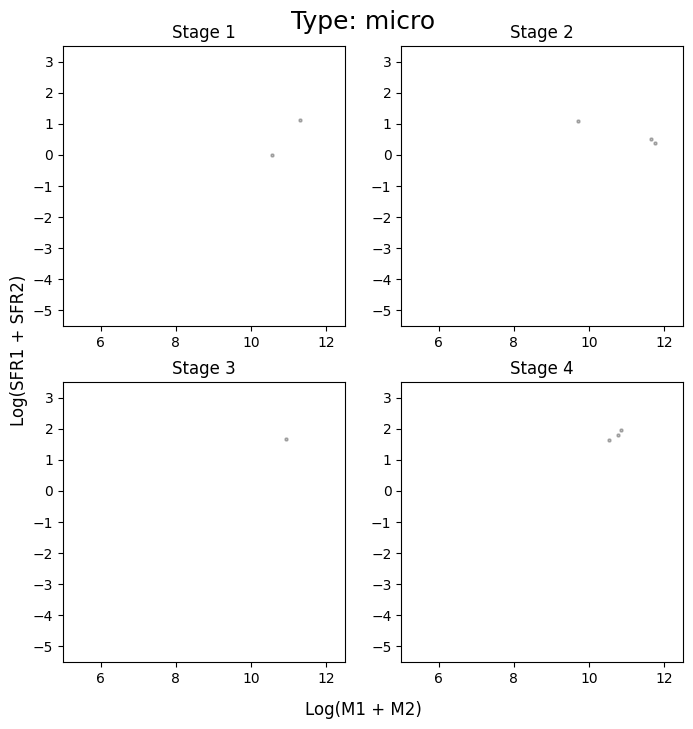

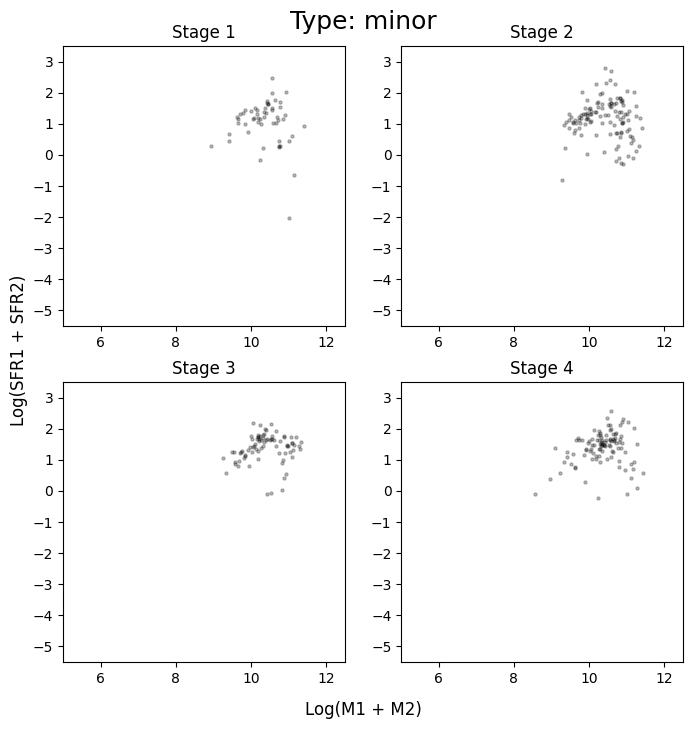

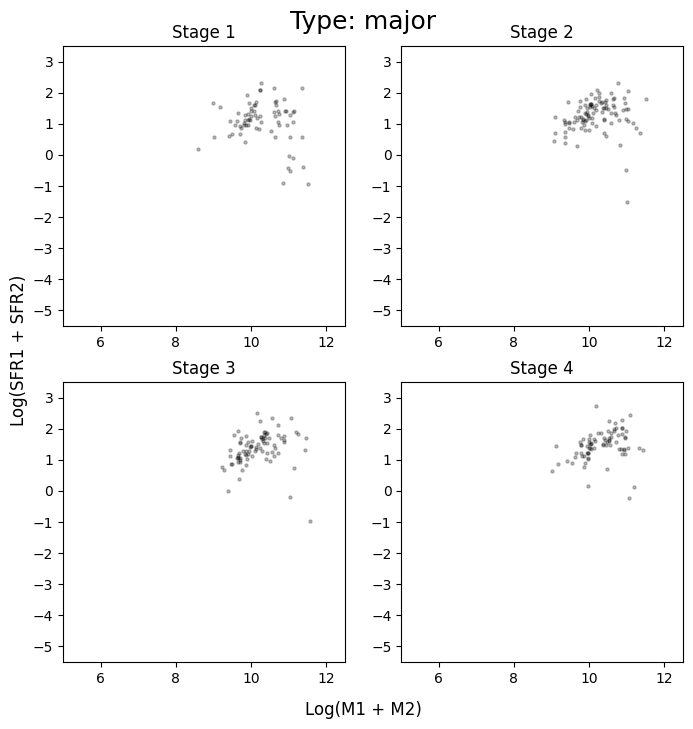

In [324]:
all_types = ['micro', 'minor', 'major']
for p in range(3):
    m_type = all_types[p]
    df_tmp = df_sum.query(f'merger_type == @m_type')
    df_tmp = df_tmp.query('z_bin == 3')
    counter = 1
    fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
    for i in range(2):
        for j in range(2):
            create_plot(df_tmp.query(f'category == "stage{counter}"'), axes[i,j], counter, 'Stage')
            counter += 1

    fig.text(0.5, 0.05, 'Log(M1 + M2)', ha='center', va='center', fontsize = 12)
    fig.text(0.07, 0.5, 'Log(SFR1 + SFR2)', ha='center', va='center', rotation='vertical', fontsize = 12)
    fig.text(0.5, 0.91, f'Type: {m_type}', ha='center', va='center', fontsize = 18)

    plt.show()

### Selection Effects of Sample

In [325]:
masses = []
for i in list(cosmo_clsf.mass_best_1):
    masses.append(i)
for i in list(cosmo_clsf.mass_best_2):
    masses.append(i)
    
zs = []
for i in list(cosmo_clsf.photoz_1):
    zs.append(i)
for i in list(cosmo_clsf.photoz_2):
    zs.append(i)

In [326]:
m_z_arr = np.asarray(list(zip(masses,zs)))

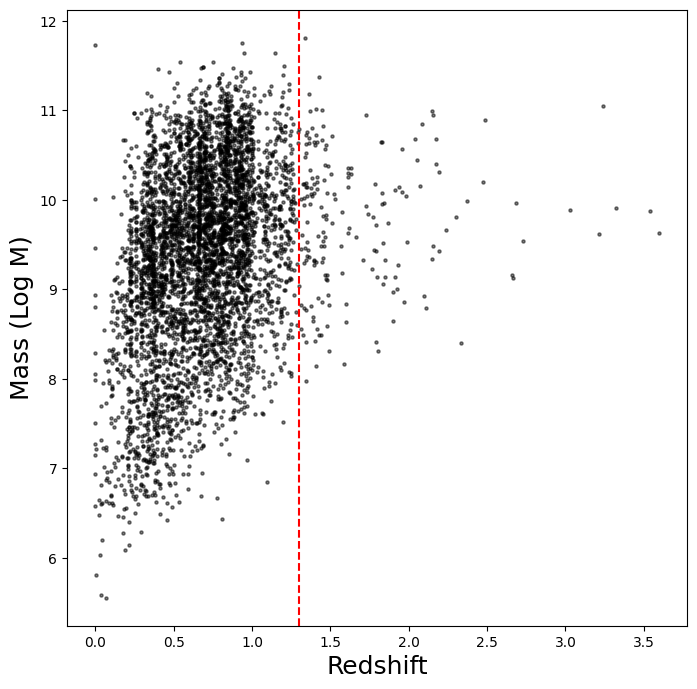

In [327]:
plt.figure(figsize = (8, 8))
plt.scatter(m_z_arr[:,1], m_z_arr[:,0], s=5, alpha = 0.5, color = 'black')
plt.axvline(1.3, color='red',linestyle='--')
plt.xlabel('Redshift', fontsize = 18)
plt.ylabel('Mass (Log M)', fontsize = 18)
plt.show()

### Plotting Stage vs Mass Ratio

In [346]:
df_s_mr = cosmo_clsf[['SourceID', 'category', 'mass_ratio', 'merger_type', 'sfr_best_1', 'sfr_best_2']]

In [347]:
df_s_sum = (
    df_s_mr
    .assign(sfr_sum = df_s_mr.apply(lambda row: adding_log(row.sfr_best_1, row.sfr_best_2), axis = 1))
)

In [352]:
def create_mr_plot(df, ax, stage, control):
    df.plot.scatter(
        x = 'recalc_mr',
        y = 'sfr_best_2',
        ax = ax,
        # xlim = [0,1],
        ylim = [-5.5, 3.5],
        xlabel = '',
        ylabel = '',
        title = f'{control} {stage}',
        color = 'black',
        alpha = 0.25,
        s = 5
    )

In [353]:
df_reval_mr = (
    df_s_sum
    .assign(recalc_mr = df_s_sum.mass_ratio.apply(lambda x: 1/x if x > 1 else x))
)

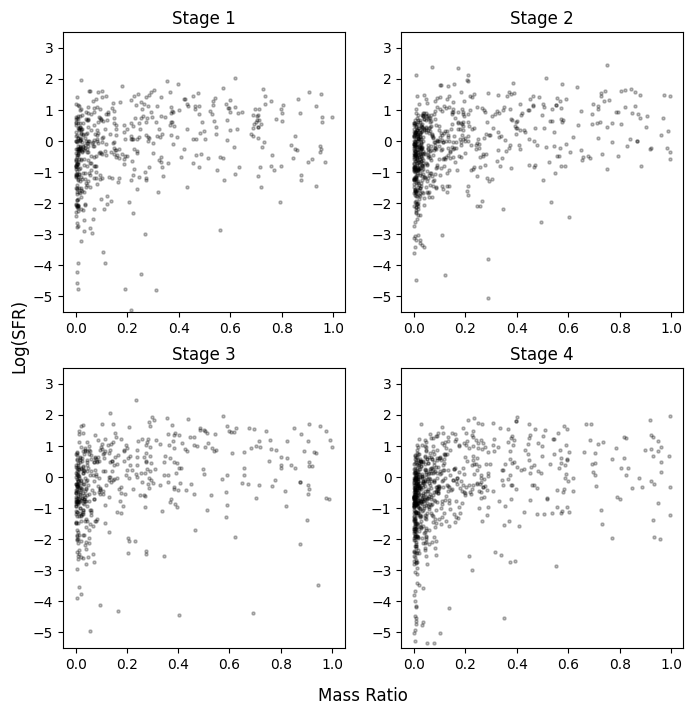

In [354]:
counter = 1
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_mr_plot(df_reval_mr.query(f'category == "stage{counter}"'), axes[i,j], counter, 'Stage')
        counter += 1
        
fig.text(0.5, 0.05, 'Mass Ratio', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(SFR)', ha='center', va='center', rotation='vertical', fontsize = 12)

plt.show()

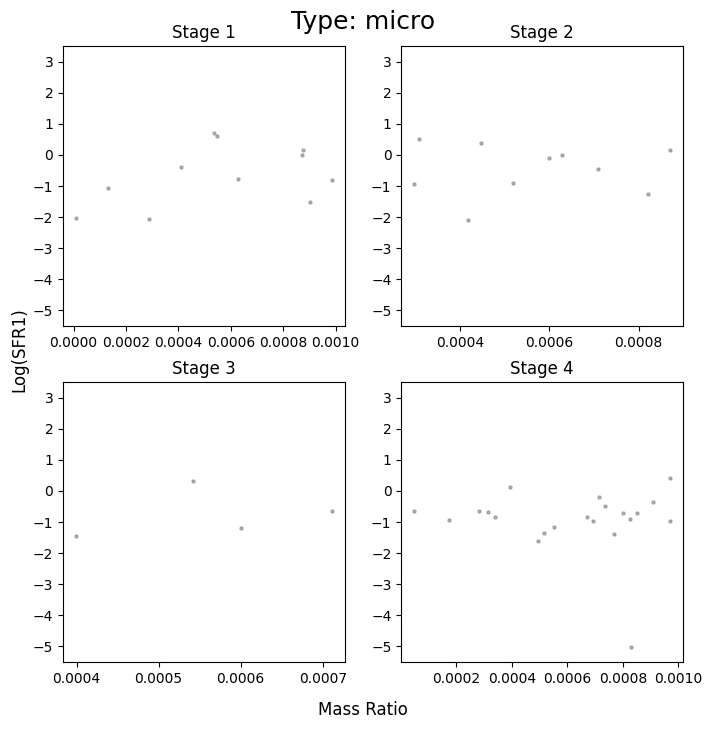

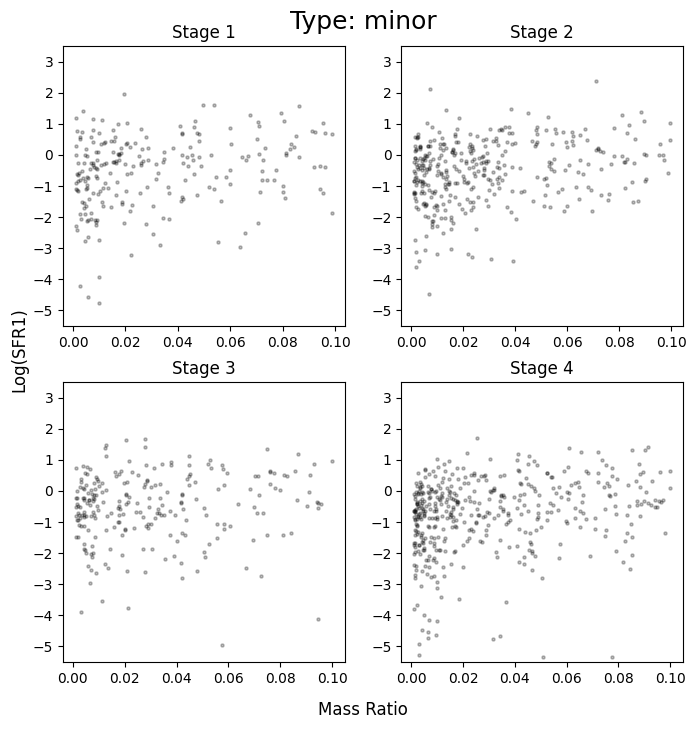

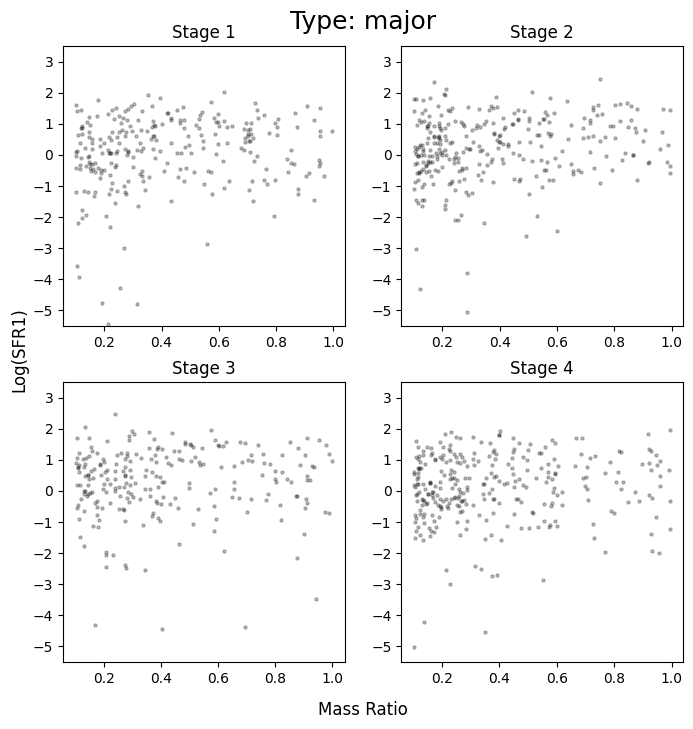

In [356]:
all_types = ['micro', 'minor', 'major']
for p in range(3):
    m_type = all_types[p]
    df_tmp = df_reval_mr.query(f'merger_type == @m_type')
    counter = 1
    fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
    for i in range(2):
        for j in range(2):
            create_mr_plot(df_tmp.query(f'category == "stage{counter}"'), axes[i,j], counter, 'Stage')
            counter += 1

    fig.text(0.5, 0.05, 'Mass Ratio', ha='center', va='center', fontsize = 12)
    fig.text(0.07, 0.5, 'Log(SFR1)', ha='center', va='center', rotation='vertical', fontsize = 12)
    fig.text(0.5, 0.91, f'Type: {m_type}', ha='center', va='center', fontsize = 18)

    plt.show()

In [ ]:
print(df_reval_mr.query(f'merger_type == "major"'))

### Individual Galaxy Masses vs Individual SFR